# We will import important libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Import Training data

In [3]:
train = pd.read_csv('Train1.csv')

In [4]:
train.head(5)

,Date,Sales,Budget,Product Page Visits,Sold Out Product Page Visits
0,2015-01-01,14840,13740,102156,1024
1,2015-02-01,14820,16466,89171,1027
2,2015-03-01,17920,18474,87444,961
3,2015-04-01,19020,17449,80774,833
4,2015-05-01,20600,22150,77179,793


# 1.1 Look at data summary

In [5]:
train.describe()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits
count,60.000000,60.000000,60.000000,60.000000
mean,27071.550000,27335.983333,97195.616667,980.950000
std,11223.424811,11455.499030,15120.520346,327.720914
min,13940.000000,12907.000000,71431.000000,26.000000
25%,18955.000000,19582.500000,84558.750000,794.500000
50%,24310.000000,25209.000000,93428.500000,960.000000
75%,30455.000000,30009.750000,109749.000000,1123.250000
max,64440.000000,66432.000000,133969.000000,1983.000000


In [6]:
# The data summary above depicts that there area no missing values.

# 2. Visual Analysis

In [7]:
# Let's look at the correlation

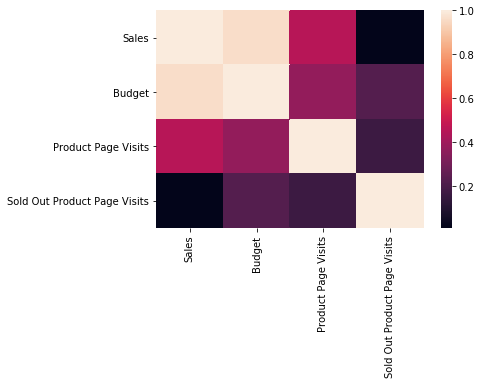

In [8]:
sns.heatmap(train.corr())

In [9]:
#This shows that the Sales are highly correlated to Budget & page Visits

# 3. Feature Engineeriung

# 3.1 Adding new columns for Year and Month.

In [10]:
# Using Date is complicated so we convert it to Year and Month.

# 3.1.1 We change format of Date column

In [11]:
train['Date'] = pd.to_datetime(train['Date'])

In [12]:
train['Date'].head(3)

0   2015-01-01
1   2015-02-01
2   2015-03-01
Name: Date, dtype: datetime64[ns]

# 3.1.2 We add Year and Month, then drop Date

In [13]:
train['Year'] = train['Date'].apply(lambda Date:Date.year)

In [14]:
train['Month'] = train['Date'].apply(lambda Date:Date.month)

In [15]:
train = train.drop('Date',axis=1)

In [16]:
train.head(3)

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month
0,14840,13740,102156,1024,2015,1
1,14820,16466,89171,1027,2015,2
2,17920,18474,87444,961,2015,3


# 3.2 One Hot Coding

In [17]:
# Here we will add one hot coding to make Year and Month Easily readable

In [18]:
dummy = pd.get_dummies(train.Month, prefix = 'Month')
dummy.drop(dummy.columns[0], axis=1, inplace = True)
train = pd.concat([train,dummy],axis = 1)

In [19]:
train.head(1)

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,14840,13740,102156,1024,2015,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
def year(Year):
    if Year == 2015:
        return 0
    elif Year == 2016:
        return 1
    elif Year ==2017:
        return 2
    elif Year == 2018:
        return 3
    elif Year ==2019:
        return 4
    else:
        return 5

In [21]:
train['Year'] = train['Year'].apply(year)

In [22]:
train.head(1)

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,14840,13740,102156,1024,0,1,0,0,0,0,0,0,0,0,0,0,0


# 3.3 Correlation after Feature Engineering

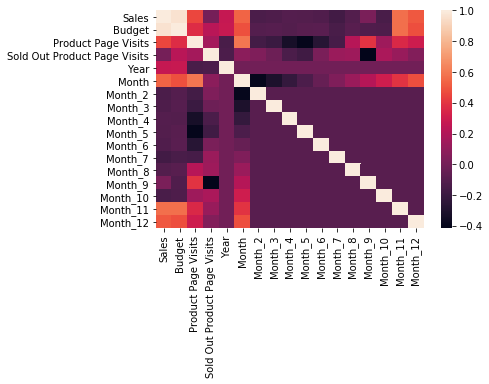

In [23]:
sns.heatmap(train.corr())

# 4. Apply all steps to test data 

In [24]:
test = pd.read_csv('Test1.csv')

In [25]:
test.head(3)

,Date,Budget,Product Page Visits,Sold Out Product Page Visits
0,2020-01-01,35200,102156,1024
1,2020-02-01,31240,89171,1027
2,2020-03-01,21362,87444,961


In [26]:
test.describe() #This shows no missing values

,Budget,Product Page Visits,Sold Out Product Page Visits
count,12.000000,12.000000,12.000000
mean,29150.000000,97195.583333,981.083333
std,10696.587493,14092.148720,182.284722
min,17226.000000,77179.000000,535.000000
25%,22220.000000,86521.500000,929.000000
50%,25179.000000,95876.500000,1025.500000
75%,32230.000000,109347.500000,1118.250000
max,53196.000000,116807.000000,1178.000000


# 4.1 Feature Engineering on test data

In [27]:
test['Date'] = pd.to_datetime(test['Date'])

In [28]:
test['Date'].head(3)

0   2020-01-01
1   2020-02-01
2   2020-03-01
Name: Date, dtype: datetime64[ns]

In [29]:
test['Year'] = test['Date'].apply(lambda Date:Date.year)

In [30]:
test['Month'] = test['Date'].apply(lambda Date:Date.month)

In [31]:
test = test.drop('Date',axis=1)

In [32]:
test.head(3)

,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month
0,35200,102156,1024,2020,1
1,31240,89171,1027,2020,2
2,21362,87444,961,2020,3


In [33]:
dummy = pd.get_dummies(test.Month, prefix = 'Month')
dummy.drop(dummy.columns[0], axis=1, inplace = True)
test = pd.concat([test,dummy],axis = 1)

In [34]:
test['Year'] = test['Year'].apply(year)

In [35]:
test.head(2)

,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,35200,102156,1024,5,1,0,0,0,0,0,0,0,0,0,0,0
1,31240,89171,1027,5,2,1,0,0,0,0,0,0,0,0,0,0


# 5. Now we train our Model
# i) Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [37]:
lr = LogisticRegression(max_iter= 1000)

In [38]:
scaler = MinMaxScaler()

# 5.1 We will set X_train, X_test & y_train and scale them

In [39]:
X_train = train.drop(['Sales','Month'], axis=1)

In [40]:
y_train = train['Sales']

In [41]:
X_test = test.drop('Month',axis=1)

In [42]:
# Now we scale to make data easy to read for our model

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_train.shape

(60, 15)

In [45]:
X_test = scaler.transform(X_test)

In [46]:
X_test.shape

(12, 15)

# 5.2 Now we train and predict the result

In [47]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prediction1 = lr.predict(X_test)

In [49]:
Result1 = pd.DataFrame(prediction1, test['Budget'], columns=['Predicted_Sales'])

In [50]:
Result1

,Predicted_Sales
Budget,
35200,32000
31240,25620
21362,17201
23452,21320
25740,23400
30866,28060
24618,22380
17226,15660
19822,24018


# 5(ii) Now we use Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
RF = RandomForestRegressor(n_estimators=60,
                          random_state=42)

In [53]:
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [54]:
prediction2 = RF.predict(X_test)

In [55]:
Result2 = pd.DataFrame(prediction2, test['Budget'], columns=['Predicted_Sales2'])

In [56]:
Result2

,Predicted_Sales2
Budget,
35200,31448.466667
31240,29278.266667
21362,19575.916667
23452,21695.400000
25740,26711.000000
30866,28855.250000
24618,22616.150000
17226,16332.600000
19822,23601.633333


# Accuracy of Random Forest is more than Logistic

# 6. We create a random dataset from train data to get r^2 values

In [57]:
df_testing = train.sample(frac = .70)

In [58]:
df_testing.head(3)

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Year,Month,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
50,17201,18149,78716,863,4,3,0,1,0,0,0,0,0,0,0,0,0
25,22140,24065,92246,1121,2,2,1,0,0,0,0,0,0,0,0,0,0
33,29720,28576,96125,815,2,10,0,0,0,0,0,0,0,0,1,0,0


In [59]:
y_testing = df_testing['Sales']

In [60]:
X_testing = df_testing.drop(['Sales','Month'],axis =1)

In [61]:
# Prediction with Logistic Regression

In [62]:
X_testing = scaler.transform(X_testing)

In [63]:
pred_lr = lr.predict(X_testing)

In [64]:
#Prediction with Random Forest

In [65]:
pred_rf = RF.predict(X_testing)

# 6.1 Now we comapare r^2 values

In [66]:
from sklearn.metrics import r2_score

In [67]:
# r2 score for Logistic Regression
r2_lr = r2_score(y_testing, pred_lr)

In [68]:
r2_lr

0.785544867916681

In [69]:
# r2 score for Random Forest
r2_rf = r2_score(y_testing, pred_rf)

In [70]:
r2_rf

0.9840287206485226

# 7. Conclusion:
# Clearly r2 score that is cofficient of determination is very close to 1 in case of Random Forest
# Hence, Predictions done with Random Forest are very accurate.

# 8.1. Budget v/s Prediction using Random Forest

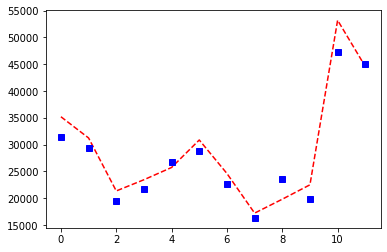

In [71]:
plt.plot(test['Budget'],'r--',prediction2, 'bs')

# 8.2. Budget v/s Prediction using Logistic Regression

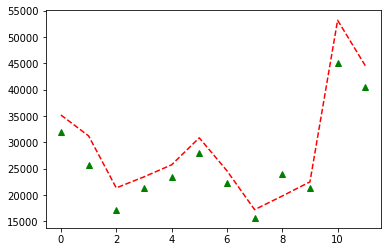

In [72]:
plt.plot(test['Budget'],'r--',prediction1, 'g^')

# Export result for Random forest as our Final Predictions

In [74]:
Result2.to_csv('Fianl_Predictions.csv')